<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/Mushroom_Classification(Random_Forest_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Change the file_path to a valid file within the dataset, e.g., "mushrooms.csv"
file_path = "mushrooms.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/mushroom-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-3-3815206846>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]


In [4]:
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment       

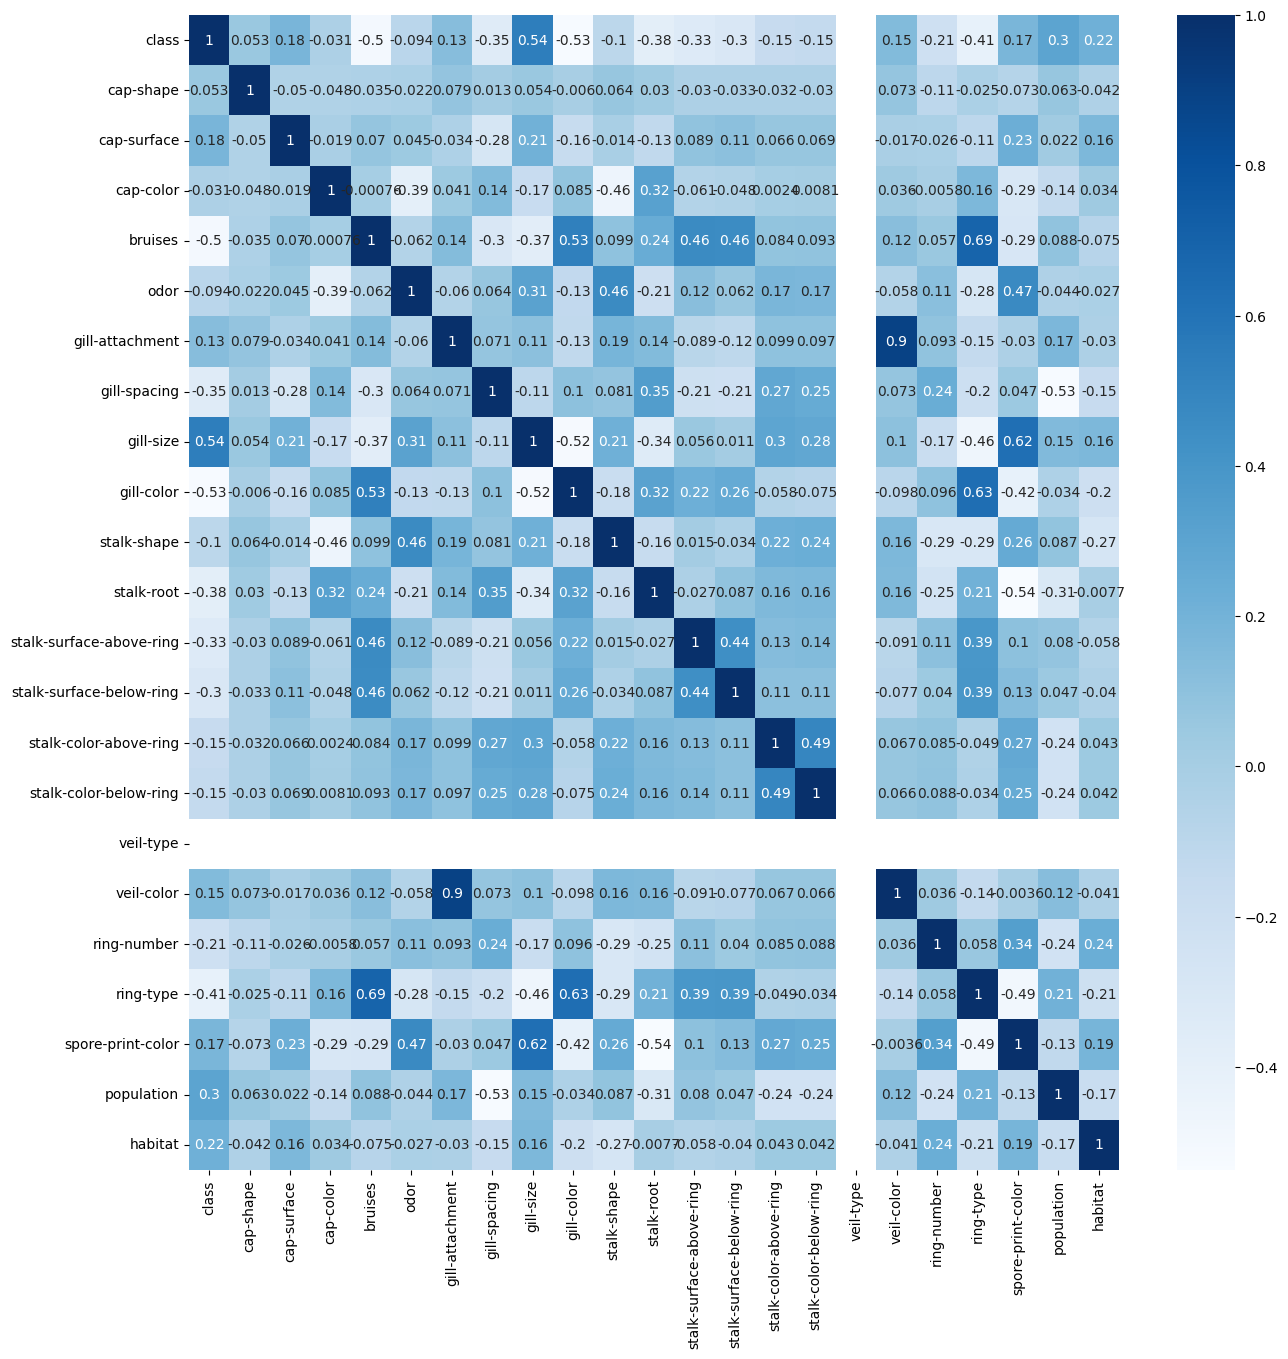

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

le=LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col])

df_corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,fmt=".2g",cmap="Blues")
plt.show()

In [6]:
ranges = df.max() - df.min()
print(ranges)

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int64


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df[['cap-shape','bruises','gill-size','gill-color','ring-type','stalk-root','gill-spacing','stalk-surface-above-ring']]
y=df['class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9895384615384616


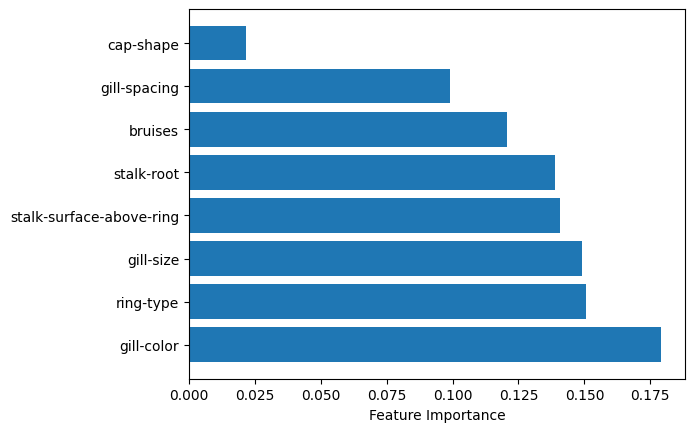

'model=RandomForestClassifier(n_estimators=100,random_state=42)\nmodel.fit(X_train,y_train)\npredictions=model.predict(X_test)\naccuracy=accuracy_score(y_test,predictions)\nprint("Accuracy:",accuracy)'

In [12]:
#A method to show the importance of various features using randomforst classifier
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel("Feature Importance")
plt.show()
''''''